In [1]:
import pandas as pd
import numpy as np

In [42]:
years = [2018, 2019, 2020, 2021, 2022]
dfs = []

for year in years:
    filename = f"./{year}.csv"
    df = pd.read_csv(filename)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

In [43]:
df.columns

Index(['egg_TaijinPrice', 'Duckegg_TNN_TaijinPrice', '入中雞雛數', '產蛋隻數',
       '均  日     產蛋箱數', '淘汰隻數', '目  前         換羽隻數', 'Date',
       'WhiteChickQuantity', 'RedChickQuantity', 'ImportChickenQuantity',
       ' 玉米粒', ' 黃豆粉 ', '玉米粉 ', '脫殼豆粉', '高蛋白豆粉', 'StationName',
       'AirTemperatureMean', 'AirTemperatureMax', 'Precipitation'],
      dtype='object')

## Data preprocessing

In [44]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [45]:
df = df.drop(columns=['StationName'])

In [46]:
# 將所有資料轉成數字，不是數字的資料會變成 NaN
df = df.apply(pd.to_numeric, errors='coerce')

In [47]:
print(df.isnull().sum())

egg_TaijinPrice              8
Duckegg_TNN_TaijinPrice     23
入中雞雛數                        0
產蛋隻數                         0
均  日     產蛋箱數                0
淘汰隻數                         0
目  前         換羽隻數            0
WhiteChickQuantity           0
RedChickQuantity             0
ImportChickenQuantity      337
 玉米粒                         0
 黃豆粉                         0
玉米粉                          3
脫殼豆粉                         0
高蛋白豆粉                        0
AirTemperatureMean           0
AirTemperatureMax            0
Precipitation              161
dtype: int64


In [48]:
# 填補缺失值
df['ImportChickenQuantity'].fillna(0, inplace=True)
df['Precipitation'].fillna(0, inplace=True)

In [49]:
# 移除含有缺失值的row
df = df.dropna()

In [50]:
print(df.isnull().sum())

egg_TaijinPrice            0
Duckegg_TNN_TaijinPrice    0
入中雞雛數                      0
產蛋隻數                       0
均  日     產蛋箱數              0
淘汰隻數                       0
目  前         換羽隻數          0
WhiteChickQuantity         0
RedChickQuantity           0
ImportChickenQuantity      0
 玉米粒                       0
 黃豆粉                       0
玉米粉                        0
脫殼豆粉                       0
高蛋白豆粉                      0
AirTemperatureMean         0
AirTemperatureMax          0
Precipitation              0
dtype: int64


In [51]:
df

,egg_TaijinPrice,Duckegg_TNN_TaijinPrice,入中雞雛數,產蛋隻數,均 日 產蛋箱數,淘汰隻數,目 前 換羽隻數,WhiteChickQuantity,RedChickQuantity,ImportChickenQuantity,玉米粒,黃豆粉,玉米粉,脫殼豆粉,高蛋白豆粉,AirTemperatureMean,AirTemperatureMax,Precipitation
Date,,,,,,,,,,,,,,,,,,
2018-01-01,24.5,34.0,1160830.0,31170982.0,114908.0,866824.0,633700.0,245600,84800,0.0,6.10,12.15,6.65,13.3,13.21,17.3,27.2,0.0
2018-01-02,24.5,34.0,1160830.0,31170982.0,114908.0,866824.0,633700.0,245600,84800,0.0,6.10,12.15,6.65,13.3,13.21,17.3,27.2,0.0
2018-01-03,26.5,34.0,1160830.0,31170982.0,114908.0,866824.0,633700.0,245600,84800,0.0,6.10,12.15,6.65,13.3,13.21,17.3,27.2,0.0
2018-01-04,26.5,34.0,1160830.0,31170982.0,114908.0,866824.0,633700.0,245600,84800,0.0,6.10,12.15,6.63,13.3,13.21,17.3,27.2,4.0
2018-01-05,26.5,34.0,1160830.0,31170982.0,114908.0,866824.0,633700.0,245600,84800,0.0,6.10,12.15,6.63,13.3,13.20,17.3,27.2,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,40.5,43.0,1592549.0,35037318.0,122636.0,1203140.0,990135.0,387890,83670,0.0,10.85,19.90,11.60,21.1,21.00,17.8,28.1,0.0
2022-12-28,40.5,43.0,1592549.0,35037318.0,122636.0,1203140.0,990135.0,387890,83670,0.0,11.05,19.90,11.68,21.1,21.00,17.8,28.1,0.0
2022-12-29,40.5,43.0,1592549.0,35037318.0,122636.0,1203140.0,990135.0,353700,91500,0.0,11.05,19.90,11.78,21.1,21.00,17.8,28.1,0.0


In [52]:
time_unit = 'week'

if time_unit == 'week':
    df = df.resample('W').mean()
    df = df.dropna()
    display(df)
else:
    display(df)

,egg_TaijinPrice,Duckegg_TNN_TaijinPrice,入中雞雛數,產蛋隻數,均 日 產蛋箱數,淘汰隻數,目 前 換羽隻數,WhiteChickQuantity,RedChickQuantity,ImportChickenQuantity,玉米粒,黃豆粉,玉米粉,脫殼豆粉,高蛋白豆粉,AirTemperatureMean,AirTemperatureMax,Precipitation
Date,,,,,,,,,,,,,,,,,,
2018-01-07,25.928571,34.000000,1.160830e+06,3.117098e+07,114908.000000,8.668240e+05,6.337000e+05,245600.000000,84800.000000,0.000000,6.100000,12.150000,6.638571,13.300000,13.205714,17.300000,27.200000,5.214286
2018-01-14,26.500000,34.000000,1.160830e+06,3.117098e+07,114908.000000,8.668240e+05,6.337000e+05,276080.000000,59700.000000,0.000000,6.071429,12.121429,6.604286,13.242857,13.137143,17.300000,27.200000,7.714286
2018-01-21,27.928571,34.000000,1.160830e+06,3.117098e+07,114908.000000,8.668240e+05,6.337000e+05,306900.000000,70077.000000,0.000000,6.058571,12.150000,6.600000,13.250000,13.150000,17.300000,27.200000,0.071429
2018-01-28,28.500000,34.000000,1.160830e+06,3.117098e+07,114908.000000,8.668240e+05,6.337000e+05,300400.000000,36500.000000,0.000000,6.157143,12.192857,6.647143,13.292857,13.222857,17.300000,27.200000,1.000000
2018-02-04,26.785714,33.714286,1.079025e+06,3.048176e+07,111952.000000,9.159131e+05,1.268700e+06,309771.428571,60765.142857,16857.142857,6.221429,12.285714,6.700000,13.385714,13.360000,16.842857,29.085714,1.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04,40.500000,43.000000,1.573356e+06,3.478227e+07,121792.571429,1.193558e+06,1.092473e+06,352299.000000,68912.428571,4261.285714,11.542857,19.850000,12.300000,21.050000,21.028571,20.714286,30.285714,0.571429
2022-12-11,40.500000,43.000000,1.592549e+06,3.503732e+07,122636.000000,1.203140e+06,9.901350e+05,353507.571429,58192.857143,0.000000,11.328571,19.900000,12.201429,21.100000,21.100000,17.800000,28.100000,0.000000
2022-12-18,40.500000,43.000000,1.592549e+06,3.503732e+07,122636.000000,1.203140e+06,9.901350e+05,381314.428571,72285.857143,0.000000,11.014286,19.900000,11.984286,21.100000,21.100000,17.800000,28.100000,1.785714


## Model

In [53]:
y_variable = 'egg_TaijinPrice'
x_variables = df.columns.difference([y_variable])

X = df[x_variables]
y = df[y_variable]

In [54]:
# train_size = int(len(df) * 0.8)
# X_train, X_test, y_train, y_test = X.iloc[:train_size], X.iloc[train_size:], y.iloc[:train_size], y.iloc[train_size:]

# 選擇20xx年作為測試集
start_date = '2020-01-01'
end_date = '2020-12-31'
test_set = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# 將測試集之外的部分作為訓練集
train_set = df.loc[(df.index < start_date)]

# 分割資料
X_train, y_train = train_set[x_variables], train_set[y_variable]
X_test, y_test = test_set[x_variables], test_set[y_variable]


In [55]:
# 搜尋最佳參數
from pmdarima import auto_arima
best_model = auto_arima(y_train, exogenous=X_train, seasonal=True, suppress_warnings=True)
order = best_model.get_params()['order']
seasonal_order = best_model.get_params()['seasonal_order']
print(order)
print(seasonal_order)

(1, 0, 1)
(0, 0, 0, 0)


In [56]:
print(y_test.shape)

(52,)


In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
way = 'normal'
step_num = 4

if way == 'normal':
    # SARIMA模型
    SARIMAXmodel = SARIMAX(y_train, exog=X_train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    model = SARIMAXmodel.fit()

    # 預測
    predictions = model.get_forecast(steps=len(y_test), exog=X_test, index=y_test.index)

else:
    # 初始化window
    window_size = len(y_train)
    history_window = y_train[-window_size:]

    # 預測結果列表
    predictions = []

    # 滾動預測循環
    for i in range(0, len(test_set), step_num):
        # 使用 SARIMA 模型进行单步预测
        model = SARIMAX(history_window, exog=X_train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
        model = model.fit(disp=False)
        prediction = model.forecast(steps=step_num, exog=X_test.iloc[i:i+step_num])

        # 將新的預測值添加到結果列表
        predictions.extend(prediction)
        
        # 更新歷史window（增加新觀測值，移除最早的觀測值）
        history_window = history_window[step_num:]
        history_window = np.append(history_window, prediction)

    # 將predictions的索引改成和y_test一樣
    predictions = pd.Series(predictions, index=y_test.index)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69989D+00    |proj g|=  8.97007D+08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      1     21      1     0     0   8.970D+08   1.700D+00
  F =   1.6998904529991059     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/opt/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible caus

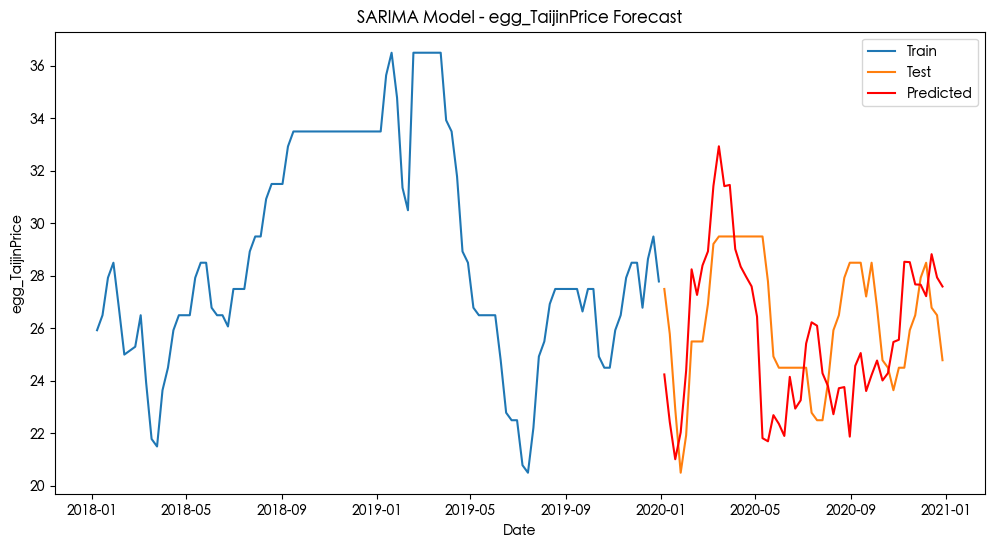

In [58]:
if way == 'normal':
    y_pred = predictions.predicted_mean
else:
    y_pred = predictions

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Predicted', color='red')

plt.title(f'SARIMA Model - {y_variable} Forecast')
plt.xlabel('Date')
plt.ylabel(y_variable)
plt.legend()
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

mspe = np.mean(((y_pred - y_test) / y_test) ** 2)
print(f'MSPE: {mspe}')


RMSE: 2.8778460722074035
MSE: 8.28199801531958
MSPE: 0.011492751607669353


In [60]:
# 查看模型的参数
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:        egg_TaijinPrice   No. Observations:                  103
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -175.089
Date:                Sun, 10 Dec 2023   AIC                            390.177
Time:                        22:27:24   BIC                            442.480
Sample:                             0   HQIC                           411.351
                                - 103                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
 玉米粒                        1.4865      0.046     32.664      0.000       1.397       1.576
 黃豆粉                      -10.7461      0.069   -154.835      0.000     -10.882     -10.610
